<a href="https://colab.research.google.com/github/rakenny1985/Final-Project/blob/master/FINALPROJECT_US_China_Aid_Totals_Type2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys                             
import numpy as np                  
import pandas as pd                   
import matplotlib as mpl               
import seaborn as sns               
import datetime as dt 
%matplotlib inline 
import matplotlib.pyplot as plt

In [82]:
file='oecd_rkedits_FINALPROJECT.xlsx'
us=pd.read_excel(file, index='unique_id')
us.head() #importing us clean excel

,unique_id,Year,Country,bilat_oda,social_infrastructure,education,water_supply_sanitation,economic_infrastructure,energy,transport,production,ag_forestry_fishing,idustry_mining_construction,trade_tourism,multi,program_assistance,food_aid,debt,humanitarian_aid,unspecified
0,Angola2005,2005,Angola,63.67,26.88,0.00,0.0,0.82,0.00,0.0,0.01,0.00,0.00,0.01,0.06,4.36,4.36,0.0,31.54,0.0
1,Benin2005,2005,Benin,21.80,16.21,3.17,0.0,0.00,0.00,0.0,0.67,0.18,0.49,0.00,2.30,2.60,2.60,0.0,0.03,0.0
2,Botswana2005,2005,Botswana,34.95,32.42,0.00,0.0,0.47,0.47,0.0,0.98,0.00,0.63,0.36,1.08,0.00,0.00,0.0,0.00,0.0
3,Burkina Faso2005,2005,Burkina Faso,33.11,14.91,12.90,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2.58,15.57,15.57,0.0,0.04,0.0
4,Burundi2005,2005,Burundi,59.05,13.61,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.05,0.36,0.36,0.0,45.03,0.0


In [83]:
us.describe()

,Year,bilat_oda,social_infrastructure,education,water_supply_sanitation,economic_infrastructure,energy,transport,production,ag_forestry_fishing,idustry_mining_construction,trade_tourism,multi,program_assistance,food_aid,debt,humanitarian_aid,unspecified
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,2011.006390,172.918978,93.089840,5.481454,2.695176,8.233578,3.086677,3.999808,8.759489,7.342268,0.518690,0.898642,4.383786,6.698866,6.684681,5.261470,45.556406,0.935974
std,3.730517,237.386894,141.207301,10.606288,16.390169,41.089257,26.818623,25.609797,21.921017,18.264171,3.909094,7.486744,6.746147,15.483857,15.484405,57.189996,110.026072,4.159242
min,2005.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,12.197500,1.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.030000,0.000000
50%,2011.000000,64.620000,34.485000,0.745000,0.000000,0.090000,0.000000,0.000000,0.380000,0.100000,0.000000,0.000000,1.895000,0.000000,0.000000,0.000000,3.325000,0.000000
75%,2014.000000,227.457500,115.772500,7.005000,1.072500,2.377500,0.050000,0.030000,8.462500,6.495000,0.260000,0.010000,5.957500,7.947500,7.922500,0.000000,23.160000,0.000000
max,2017.000000,1330.400000,707.500000,137.200000,300.080000,583.810000,423.450000,376.240000,254.710000,191.510000,94.360000,168.650000,77.960000,151.800000,151.800000,1028.090000,768.230000,41.550000


In [84]:
us.groupby(['Year']).sum() #grouping by year totals

,bilat_oda,social_infrastructure,education,water_supply_sanitation,economic_infrastructure,energy,transport,production,ag_forestry_fishing,idustry_mining_construction,trade_tourism,multi,program_assistance,food_aid,debt,humanitarian_aid,unspecified
Year,,,,,,,,,,,,,,,,,
2005,4368.06,1724.16,109.87,11.33,207.29,3.26,80.98,124.01,110.00,9.63,4.41,166.76,218.42,213.34,98.16,1829.34,0.01
2006,5875.42,2172.65,119.42,6.45,65.32,2.95,13.59,257.59,72.62,4.77,180.20,188.21,259.52,256.72,1522.38,1409.75,0.01
2007,6437.13,3341.77,130.87,24.41,486.95,11.11,397.52,538.77,421.24,106.88,10.63,250.25,291.69,291.69,31.34,1496.38,0.00
2008,9553.21,5207.42,197.67,455.47,1034.12,218.22,746.61,292.26,260.52,15.00,16.76,167.52,299.26,299.26,198.92,2353.75,0.00
2009,8968.41,4743.36,368.30,79.17,505.35,31.12,388.00,540.59,435.69,33.04,71.85,306.52,378.57,377.57,166.38,2327.58,0.00
2010,7516.35,4346.78,194.20,67.23,584.67,79.80,454.70,385.03,364.04,11.39,9.63,167.16,284.59,284.59,20.09,1705.79,22.20
2011,8831.17,5045.07,250.75,75.46,197.38,19.47,118.40,354.91,286.71,28.66,39.52,167.22,287.99,287.99,1028.51,1718.93,31.18
2012,7617.32,4628.99,237.89,138.52,120.57,19.14,50.02,405.98,318.27,24.88,62.85,178.23,305.99,305.99,35.27,1912.45,29.88
2013,8843.96,5319.95,263.69,398.90,416.75,301.44,79.36,448.79,390.44,21.88,36.44,167.59,234.73,234.73,171.82,2053.56,30.76


In [0]:
aggdata=us.groupby(['Year']).sum() #creating new dataframe for later use

<BarContainer object of 13 artists>

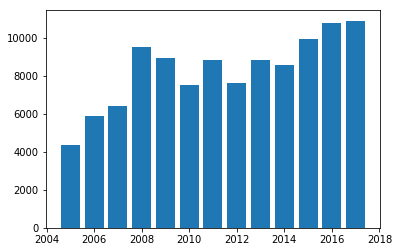

In [86]:
plt.bar(aggdata.index, aggdata['bilat_oda'], align='center') #ugly plot just to see what I've got

In [87]:
us.groupby(['Year', 'Country']).sum() #grouping by country

bilat_oda  social_infrastructure  \
Year Country                                                              
2005 Angola                                63.67                  26.88   
     Benin                                 21.80                  16.21   
     Botswana                              34.95                  32.42   
     Burkina Faso                          33.11                  14.91   
     Burundi                               59.05                  13.61   
     Cabo Verde                           116.38                   0.08   
     Cameroon                              15.22                   4.49   
     Central African Republic              15.85                   0.63   
     Chad                                  60.56                   5.01   
     Comoros                                0.03                   0.02   
     Congo                                 18.35                   0.44   
     Côte d'Ivoire                         31.36                  21.62   
     Democratic Republic of the Congo     142.91                  53.46   
     Djibouti                               2.94                   1.28   
     Equatorial Guinea                      0.19                   0.19   
     Eritrea                              131.77                   1.00   
     Eswatini                               1.57                   0.11   
     Ethiopia                             678.18                  99.02   
     Gabon                                  1.92                   0.19   
     Gambia                                 2.23                   0.12   
     Ghana                                 74.70                  14.46   
     Guinea                                43.08                  15.62   
     Guinea-Bissau                          1.86                   0.30   
     Kenya                                232.31                 146.97   
     Lesotho                                3.38                   0.41   
     Liberia                               90.93                  46.10   
     Madagascar                           189.10                  53.76   
     Malawi                                83.83                  40.72   
     Mali                                  48.02                  42.02   
     Mauritania                            19.02                   0.21   
...                                          ...                    ...   
2017 Ethiopia                            1116.43                 342.61   
     Gabon                                  0.95                   0.20   
     Gambia                                18.87                   3.55   
     Ghana                                238.34                 117.39   
     Guinea                                56.30                  47.70   
     Guinea-Bissau                          1.52                   1.50   
     Kenya                                934.09                 685.63   
     Lesotho                               71.98                  67.88   
     Liberia                              222.02                 124.96   
     Madagascar                            91.23                  48.53   
     Malawi                               252.50                 162.21   
     Mali                                 214.53                 100.35   
     Mauritania                            13.12                   3.08   
     Mozambique                           488.11                 426.42   
     Namibia                               52.92                  50.91   
     Niger                                117.65                  22.40   
     Nigeria                              795.52                 332.35   
     Rwanda                               168.62                 106.84   
     Sao Tome and Principe                  0.15                   0.07   
     Senegal                              159.64                  89.43   
     Sierra Leone                          64.93                

In [88]:
aggdata.dtypes #checking types

bilat_oda                      float64
social_infrastructure          float64
education                      float64
water_supply_sanitation        float64
economic_infrastructure        float64
energy                         float64
transport                      float64
production                     float64
ag_forestry_fishing            float64
idustry_mining_construction    float64
trade_tourism                  float64
multi                          float64
program_assistance             float64
food_aid                       float64
debt                           float64
humanitarian_aid               float64
unspecified                    float64
dtype: object

In [0]:
aggdata1 = aggdata.drop(columns="bilat_oda")

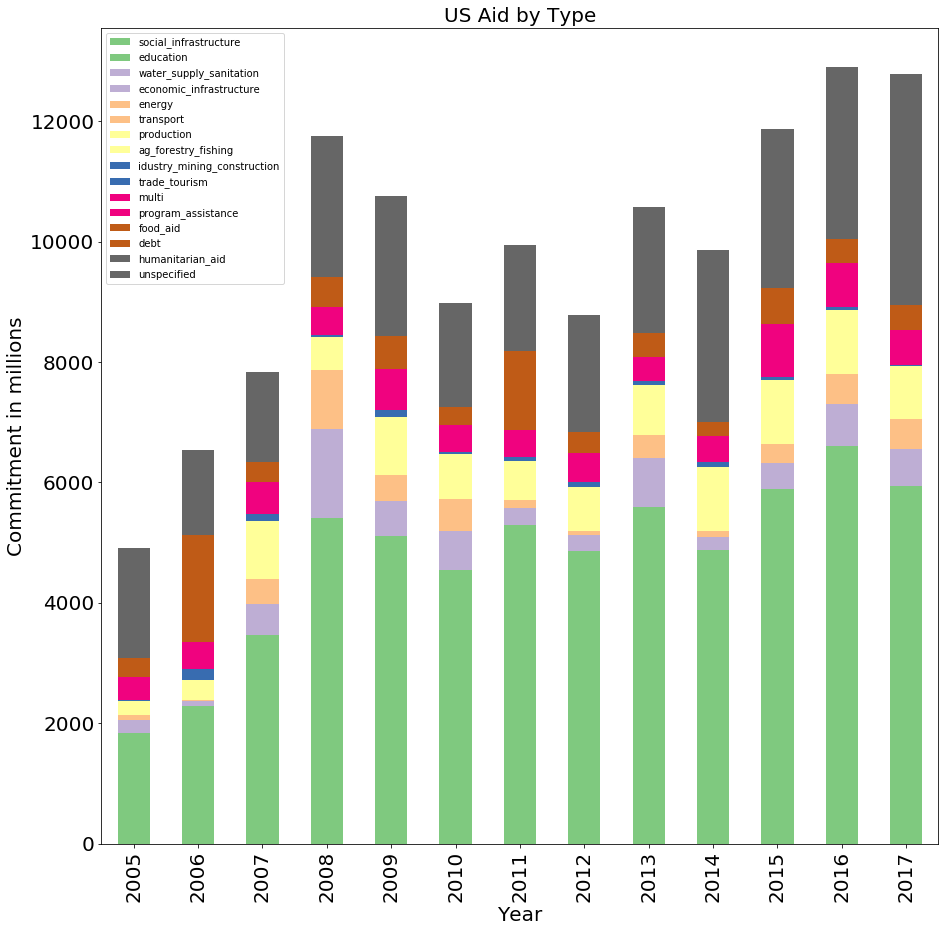

In [90]:
ax = aggdata1.plot(kind='bar', stacked=True, figsize=(15,15), cmap='Accent');#matplotlib website helps big time
ax.legend();
plt.title('US Aid by Type');
plt.xlabel('Year')
plt.ylabel('Commitment in millions');
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20) #plotting us aid by type for all columns grouped by years from aggdata df

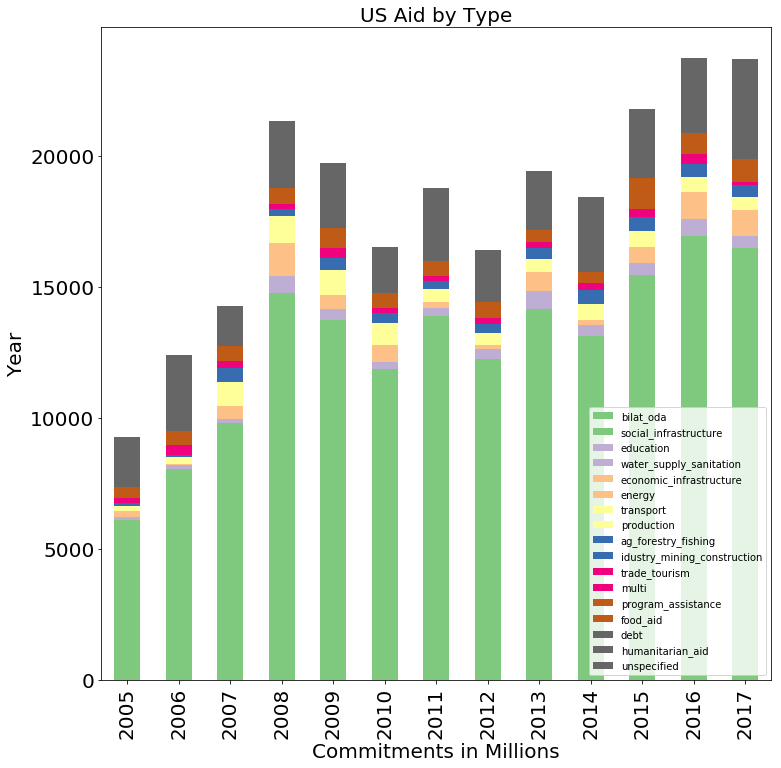

In [91]:
ax = aggdata.plot(kind='bar', stacked=True, figsize=(12,12), cmap='Accent');#matplotlib website helps big time
ax.legend();
plt.title('US Aid by Type');
plt.xlabel('Commitments in Millions')
plt.ylabel('Year');
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20) #plotting us aid by type for all columns grouped by years from aggdata df

In [92]:
file='AidData_GlobalChineseOfficialFinanceDataset_v1.0_RKEDITS_FINALPROJECT.xlsx'
china=pd.read_excel(file, index='unique_id')
china.head() #importing china official financing clean excel

,unique_id,Country,Year,Action Relating to Debt,"Agriculture, Forestry and Fishing",Business and Other Services,Communications,Developmental Food Aid/Food Security Assistance,Education,Emergency Response,...,Other Multisector,Other Social infrastructure and services,Population Policies / Programmes and Reproductive Health,Support to Non-governmental Organizations (NGOs) and Government Organizations,Trade and Tourism,Transport and Storage,Unallocated / Unspecified,Water Supply and Sanitation,Women in Development,Total
0,"Africa, regional2001","Africa, regional",2001,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,27.237943,0.0,0.0,0.0,27.237943
1,"Africa, regional2006","Africa, regional",2006,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,367.882199,0.0,9.197055,0.0,0.0,0.0,377.998959
2,"Africa, regional2007","Africa, regional",2007,0.0,0.0,0.0,172.518381,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,172.518381
3,"Africa, regional2009","Africa, regional",2009,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,54.148242,0.0,0.0,0.0,54.148242
4,"Africa, regional2011","Africa, regional",2011,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,83.249049,0.0,0.0,0.0,83.249049


In [118]:
china.describe() #describing the data

,Year,Action Relating to Debt,"Agriculture, Forestry and Fishing",Business and Other Services,Communications,Developmental Food Aid/Food Security Assistance,Education,Emergency Response,Energy Generation and Supply,General Budget Support,...,Other Multisector,Other Social infrastructure and services,Population Policies / Programmes and Reproductive Health,Support to Non-governmental Organizations (NGOs) and Government Organizations,Trade and Tourism,Transport and Storage,Unallocated / Unspecified,Water Supply and Sanitation,Women in Development,Total
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,...,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,2006.689888,8.335654,1.297151,0.018443,7.123142,0.198048,1.325960,0.695888,13.140421,0.111663,...,8.197657,4.389853,0.001676,0.867532,2.201515,34.409553,4.977121,7.416232,0.026197,106.307307
std,4.369531,34.948259,8.614997,0.291869,36.630350,1.521104,7.944888,4.447537,92.027462,1.979307,...,75.080526,27.117318,0.030281,17.449518,42.277746,149.281476,34.219389,70.596086,0.552233,246.014581
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008008
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.493468
50%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.477301
75%,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.886722
max,2014.000000,388.115720,136.528441,5.569156,452.035245,17.759797,110.188815,56.290530,1607.419408,41.215882,...,1016.753364,477.925273,0.634935,367.882199,889.659193,2118.070870,673.026035,1054.210690,11.649390,2618.571017


In [119]:
china.groupby(['Year']).sum() #grouping by year - having a problem with the year column being a float, not sure why china is like this but us was ok.

,Action Relating to Debt,"Agriculture, Forestry and Fishing",Business and Other Services,Communications,Developmental Food Aid/Food Security Assistance,Education,Emergency Response,Energy Generation and Supply,General Budget Support,General Environmental Protection,...,Other Multisector,Other Social infrastructure and services,Population Policies / Programmes and Reproductive Health,Support to Non-governmental Organizations (NGOs) and Government Organizations,Trade and Tourism,Transport and Storage,Unallocated / Unspecified,Water Supply and Sanitation,Women in Development,Total
Year,,,,,,,,,,,,,,,,,,,,,
2000,133.890530,14.877003,8.20716,466.161346,0.000000,2.434091,4.442592,236.883741,0.000000,0.000000,...,16.447028,115.806790,0.000000,0.000000,0.000000,470.494104,18.761170,195.060893,0.000000,2008.315380
2001,1310.991567,101.818443,0.00000,315.389003,31.823913,254.271400,68.855264,993.499546,0.000000,0.000000,...,723.864792,136.372445,0.050114,0.000000,0.000000,4635.420394,175.022425,915.006616,11.649390,11497.992528
2003,282.936066,15.423056,0.00000,23.451510,1.101647,29.744466,0.550823,0.000000,0.000000,0.000000,...,5.686405,95.771295,0.060987,0.000000,0.000000,121.959442,64.428843,4.688156,0.000000,759.946192
2004,0.000000,0.000000,0.00000,22.310966,0.000000,7.730222,1.244922,1636.270526,41.215882,0.000000,...,0.000000,112.838283,0.000000,0.000000,0.000000,94.919941,40.813604,0.000000,0.000000,2039.954464
2005,179.480028,13.994792,0.00000,124.720369,0.195494,0.008030,8.436110,429.220254,1.964127,0.000000,...,12.003351,42.796022,0.000000,0.000000,0.005327,356.991802,230.311621,24.265577,0.000000,1459.374076
2006,456.517979,91.716876,0.00000,235.769247,3.646644,84.923656,8.426794,133.801546,0.000000,0.000000,...,6.920770,182.934295,0.000000,367.882199,0.000000,1512.578067,88.205696,100.296051,0.000000,3561.255855
2007,1182.488753,32.919109,0.00000,361.179112,0.000000,24.441624,14.219616,525.008369,6.510128,0.000000,...,355.151036,209.627210,0.000000,0.000000,0.000000,381.656229,76.474595,528.448577,0.000000,4027.694876
2008,0.000000,51.053233,0.00000,119.413874,1.378913,32.035713,27.229279,114.587678,0.000000,0.000000,...,31.739601,110.079376,0.000000,0.000000,0.000000,1017.651601,28.450149,39.709939,0.000000,1711.577641
2009,0.000000,58.056661,0.00000,0.000000,1.994935,9.183181,8.974740,339.247555,0.000000,40.712964,...,164.151114,152.278469,0.000000,0.000000,62.155124,1023.388196,140.006106,1054.210690,0.003203,3711.533300


In [0]:
aggdata_china=china.groupby(['Year']).sum() #creating a new df summed by year

In [121]:
china.groupby(['Year', 'Country']).sum() #seeing by year and by country

Action Relating to Debt  \
Year Country                                      
2000 Algeria                           0.000000   
     Angola                            0.000000   
     Benin                             0.000000   
     Cameroon                         12.971102   
     Congo, Dem. Rep.                  0.000000   
     Congo, Rep.                       0.000000   
     Cote D'Ivoire                     0.000000   
     Equatorial Guinea                 0.000000   
     Eritrea                           0.000000   
     Ethiopia                          0.000000   
     Gabon                             0.000000   
     Ghana                           120.919428   
     Guinea-Bissau                     0.000000   
     Kenya                             0.000000   
     Lesotho                           0.000000   
     Madagascar                        0.000000   
     Mauritius                         0.000000   
     Morocco                           0.000000   
     Mozambique                        0.000000   
     Namibia                           0.000000   
     Niger                             0.000000   
     Nigeria                           0.000000   
     Sierra Leone                      0.000000   
     South Africa                      0.000000   
     Sudan                             0.000000   
     Tanzania                          0.000000   
     Uganda                            0.000000   
     Zambia                            0.000000   
     Zimbabwe                          0.000000   
2001 Africa, regional                  0.000000   
...                                         ...   
2014 Benin                             0.000000   
     Botswana                          0.000000   
     Burundi                           0.000000   
     Cameroon                          0.000000   
     Congo, Dem. Rep.                  0.000000   
     Congo, Rep.                       0.000000   
     Djibouti                          0.000000   
     Egypt                             0.000000   
     Ethiopia                          0.000000   
     Ghana                             0.000000   
     Guinea                            0.000000   
     Kenya                             0.000000   
     Liberia                           0.000000   
     Malawi                            0.000000   
     Mali                              0.000000   
     Mauritania                        0.000000   
     Mozambique                        0.000000   
     Namibia                           0.000000   
     Nigeria                           0.000000   
     Rwanda                            0.000000   
     Senegal                           0.000000   
     Sierra Leone                      0.000000   
     Somalia                           0.000000   
     South Sudan                       0.000000   
     Sudan                             0.000000   
     Tanzania                          0.000000   
     Togo                              0.000000   
     Uganda                            0.000000   
     Zambia                            0.000000   
     Zimbabwe                          0.000000   

                        Agriculture, Forestry and Fishing  \
Year Country                                                
2000 Algeria                                     0.000000   
     Angola                                      0.000000   
     Benin                                       0.000000   
     Cameroon                                    0.000000   
     Congo, Dem. Rep.                            0.000000   
     Congo, Rep.                                 0.000000   
     Cote D'Ivoire                               0.000000   
     Equatorial Guinea                           0.000000   
     Eritrea                                     0.000000   
     Ethiopia                                    1.911479   
     Gabon                                       0.000000   
     Ghana       

In [122]:
aggdata_china.dtypes

Action Relating to Debt                                                          float64
Agriculture, Forestry and Fishing                                                float64
Business and Other Services                                                      float64
Communications                                                                   float64
Developmental Food Aid/Food Security Assistance                                  float64
Education                                                                        float64
Emergency Response                                                               float64
Energy Generation and Supply                                                     float64
General Budget Support                                                           float64
General Environmental Protection                                                 float64
Government and Civil Society                                                     float64
Health               

In [0]:
aggdata_china1 = aggdata_china.drop(columns="Total")

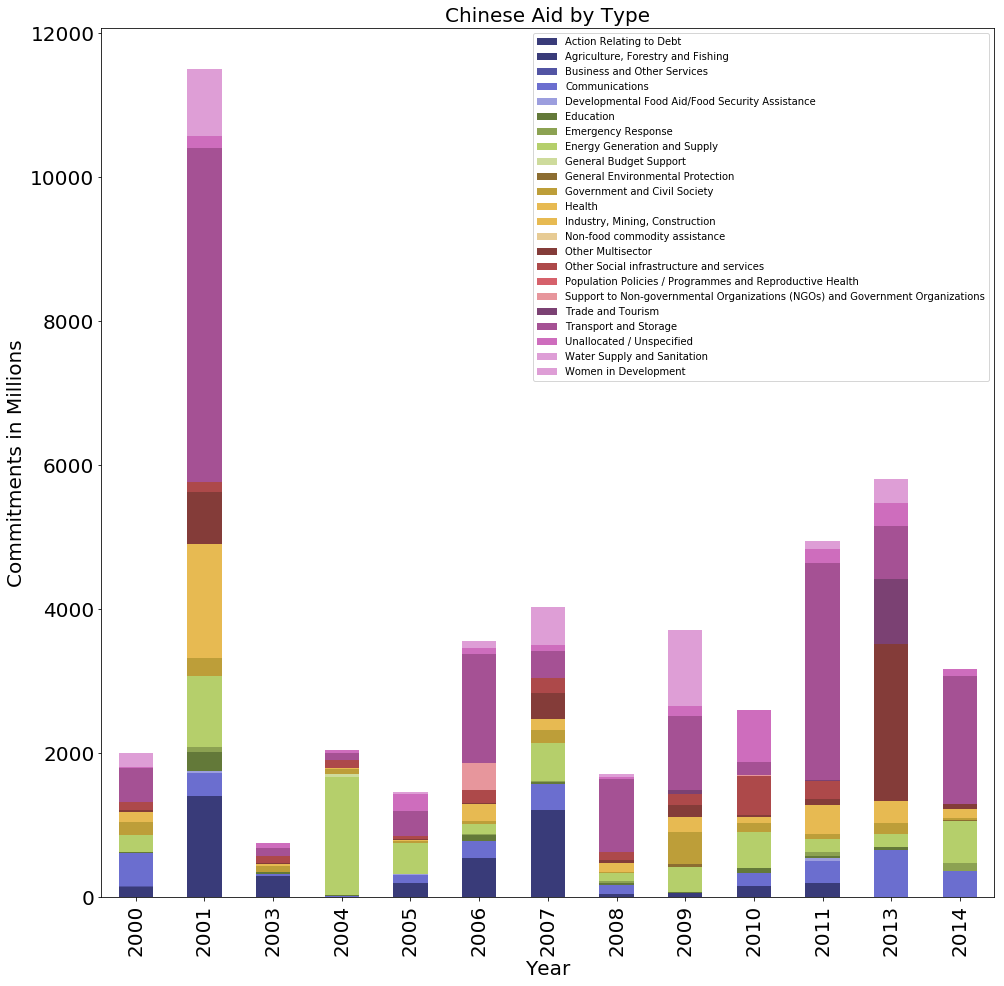

In [124]:
ax = aggdata_china1.plot(kind='bar', stacked=True, figsize=(16,16), cmap='tab20b');
ax.legend();
plt.title('Chinese Aid by Type');
plt.xlabel('Year')
plt.ylabel('Commitments in Millions');
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20) #plotting similarly to us plot above, looks pretty ok

In [125]:
aggdata.drop(aggdata.columns[1:], axis=1, inplace=True)
aggdata.head(5) #getting rid of columns in us df for next graph - using bilat_oda for comparison sake

,us_oda
Year,
2005,4368.06
2006,5875.42
2007,6437.13
2008,9553.21
2009,8968.41


In [126]:
aggdata.columns=['us_oda']
aggdata.head(10) #changing column name

,us_oda
Year,
2005,4368.06
2006,5875.42
2007,6437.13
2008,9553.21
2009,8968.41
2010,7516.35
2011,8831.17
2012,7617.32
2013,8843.96


In [127]:
aggdata_china1['bilat_oda'] = aggdata_china1.sum(axis=1)
aggdata_china1.head(5) #getting a total for each row on china df to compare to us

,Action Relating to Debt,"Agriculture, Forestry and Fishing",Business and Other Services,Communications,Developmental Food Aid/Food Security Assistance,Education,Emergency Response,Energy Generation and Supply,General Budget Support,General Environmental Protection,...,Other Multisector,Other Social infrastructure and services,Population Policies / Programmes and Reproductive Health,Support to Non-governmental Organizations (NGOs) and Government Organizations,Trade and Tourism,Transport and Storage,Unallocated / Unspecified,Water Supply and Sanitation,Women in Development,bilat_oda
Year,,,,,,,,,,,,,,,,,,,,,
2000,133.890530,14.877003,8.20716,466.161346,0.000000,2.434091,4.442592,236.883741,0.000000,0.0,...,16.447028,115.806790,0.000000,0.0,0.000000,470.494104,18.761170,195.060893,0.00000,2008.315380
2001,1310.991567,101.818443,0.00000,315.389003,31.823913,254.271400,68.855264,993.499546,0.000000,0.0,...,723.864792,136.372445,0.050114,0.0,0.000000,4635.420394,175.022425,915.006616,11.64939,11497.992528
2003,282.936066,15.423056,0.00000,23.451510,1.101647,29.744466,0.550823,0.000000,0.000000,0.0,...,5.686405,95.771295,0.060987,0.0,0.000000,121.959442,64.428843,4.688156,0.00000,759.946192
2004,0.000000,0.000000,0.00000,22.310966,0.000000,7.730222,1.244922,1636.270526,41.215882,0.0,...,0.000000,112.838283,0.000000,0.0,0.000000,94.919941,40.813604,0.000000,0.00000,2039.954464
2005,179.480028,13.994792,0.00000,124.720369,0.195494,0.008030,8.436110,429.220254,1.964127,0.0,...,12.003351,42.796022,0.000000,0.0,0.005327,356.991802,230.311621,24.265577,0.00000,1459.374076


In [128]:
aggdata_china1.drop(aggdata_china1.columns[0:22],axis=1, inplace=True)
aggdata_china1.head(5) #dumping unnecessary columns

,Women in Development,bilat_oda
Year,,
2000,0.00000,2008.315380
2001,11.64939,11497.992528
2003,0.00000,759.946192
2004,0.00000,2039.954464
2005,0.00000,1459.374076


In [131]:
aggdata_china2 = aggdata_china1.drop(columns="Women in Development")
aggdata_china2.head(5)

,bilat_oda
Year,
2000,2008.315380
2001,11497.992528
2003,759.946192
2004,2039.954464
2005,1459.374076


In [132]:
aggdata_china2.columns=['china_oda']
aggdata_china2.head(10)

,china_oda
Year,
2000,2008.315380
2001,11497.992528
2003,759.946192
2004,2039.954464
2005,1459.374076
2006,3561.255855
2007,4027.694876
2008,1711.577641
2009,3711.533300


In [134]:
aggdata_china2.dtypes

china_oda    float64
dtype: object

In [135]:
df_merge = pd.merge(aggdata, aggdata_china2, on='Year')

df_merge #merging two new aggdata df's by year

,us_oda,china_oda
Year,,
2005,4368.06,1459.374076
2006,5875.42,3561.255855
2007,6437.13,4027.694876
2008,9553.21,1711.577641
2009,8968.41,3711.533300
2010,7516.35,2607.969936
2011,8831.17,4943.985348
2013,8843.96,5801.937714
2014,8575.90,3175.214412


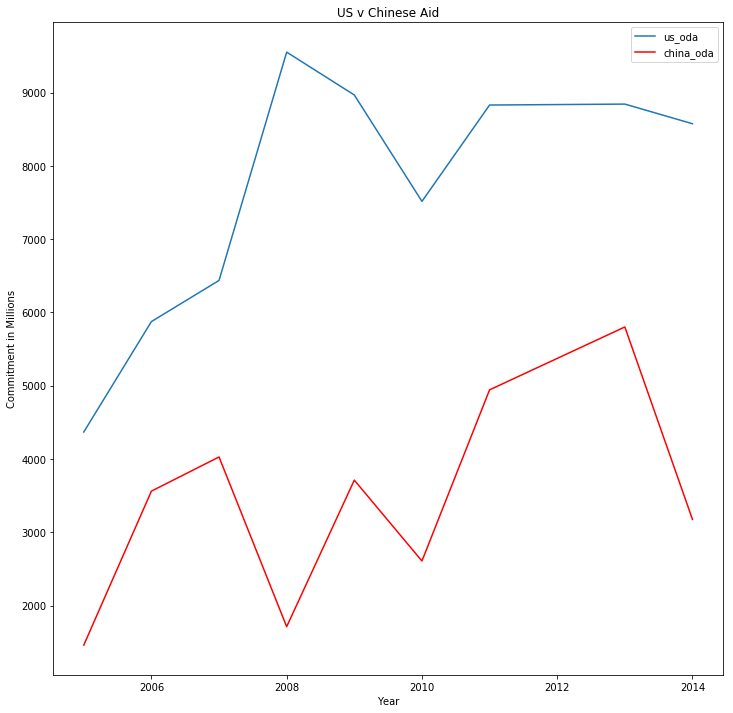

In [136]:
fig,ax=plt.subplots(figsize=(12,12))
ax.plot(df_merge.us_oda,alpha=1)
ax.plot(df_merge.china_oda,'-r',alpha=1)
ax.legend()
plt.xlabel('Year')
plt.ylabel('Commitment in Millions');
ax.set_title('US v Chinese Aid'); #plotting the comparison of total oda per year